In this notebook, we mainly utilize extreme gradient boost to improve the prediction model originially proposed in TLE 2016 November machine learning tuotrial. Extreme gradient boost can be viewed as an enhanced version of gradient boost by using a more regularized model formalization to control over-fitting, and XGB usually performs better. Applications of XGB can be found in many Kaggle competitions. Some recommended tutorrials can be found

Our work will be orginized in the follwing order:

•Background

•Exploratory Data Analysis

•Data Prepration and Model Selection

•Final Results

# Background

The dataset we will use comes from a class excercise from The University of Kansas on Neural Networks and Fuzzy Systems. This exercise is based on a consortium project to use machine learning techniques to create a reservoir model of the largest gas fields in North America, the Hugoton and Panoma Fields. For more info on the origin of the data, see Bohling and Dubois (2003) and Dubois et al. (2007).

The dataset we will use is log data from nine wells that have been labeled with a facies type based on oberservation of core. We will use this log data to train a classifier to predict facies types.

This data is from the Council Grove gas reservoir in Southwest Kansas. The Panoma Council Grove Field is predominantly a carbonate gas reservoir encompassing 2700 square miles in Southwestern Kansas. This dataset is from nine wells (with 4149 examples), consisting of a set of seven predictor variables and a rock facies (class) for each example vector and validation (test) data (830 examples from two wells) having the same seven predictor variables in the feature vector. Facies are based on examination of cores from nine wells taken vertically at half-foot intervals. Predictor variables include five from wireline log measurements and two geologic constraining variables that are derived from geologic knowledge. These are essentially continuous variables sampled at a half-foot sample rate.

The seven predictor variables are:
•Five wire line log curves include gamma ray (GR), resistivity logging (ILD_log10), photoelectric effect (PE), neutron-density porosity difference and average neutron-density porosity (DeltaPHI and PHIND). Note, some wells do not have PE.
•Two geologic constraining variables: nonmarine-marine indicator (NM_M) and relative position (RELPOS)

The nine discrete facies (classes of rocks) are:

1.Nonmarine sandstone

2.Nonmarine coarse siltstone 

3.Nonmarine fine siltstone 

4.Marine siltstone and shale 

5.Mudstone (limestone)

6.Wackestone (limestone)

7.Dolomite

8.Packstone-grainstone (limestone)

9.Phylloid-algal bafflestone (limestone)

These facies aren't discrete, and gradually blend into one another. Some have neighboring facies that are rather close. Mislabeling within these neighboring facies can be expected to occur. The following table lists the facies, their abbreviated labels and their approximate neighbors.


Facies/ Label/ Adjacent Facies

1 SS 2 

2 CSiS 1,3 

3 FSiS 2 

4 SiSh 5 

5 MS 4,6 

6 WS 5,7 

7 D 6,8 

8 PS 6,7,9 

9 BS 7,8 


The first thing we notice for this data is that it seems that neighboring facies are not symmetric, for example, the adjacent facies for 9 could be 7, yet the adjacent facies for 7 couldn't be 9. We already contacted the authors regarding this. 

# Exprolatory Data Analysis

After the background intorduction, we start to import the pandas library for some basic data analysis and manipulation. The matplotblib and seaborn are imported for data vislization. 

In [1]:
%matplotlib inline
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as colors

In [4]:
filename = '../facies_vectors.csv'
training_data = pd.read_csv(filename)
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
5,3,A1 SH,SHRIMPLIN,2795.5,73.970,0.636,14.000,13.385,3.600,1,0.894
6,3,A1 SH,SHRIMPLIN,2796.0,73.720,0.630,15.600,13.930,3.700,1,0.872
7,3,A1 SH,SHRIMPLIN,2796.5,75.650,0.625,16.500,13.920,3.500,1,0.830
8,3,A1 SH,SHRIMPLIN,2797.0,73.790,0.624,16.200,13.980,3.400,1,0.809
9,3,A1 SH,SHRIMPLIN,2797.5,76.890,0.615,16.900,14.220,3.500,1,0.787


In [11]:
training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
Facies       4149 non-null int64
Formation    4149 non-null category
Well Name    4149 non-null category
Depth        4149 non-null float64
GR           4149 non-null float64
ILD_log10    4149 non-null float64
DeltaPHI     4149 non-null float64
PHIND        4149 non-null float64
PE           3232 non-null float64
NM_M         4149 non-null int64
RELPOS       4149 non-null float64
dtypes: category(2), float64(7), int64(2)
memory usage: 300.1 KB


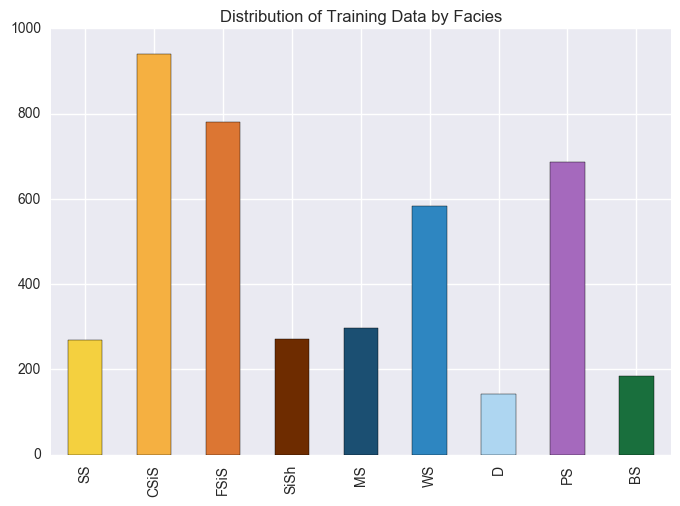

In [5]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72',
                 '#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS','WS', 'D','PS', 'BS']

facies_counts = training_data['Facies'].value_counts().sort_index()
facies_counts.index = facies_labels
facies_counts.plot(kind='bar',color=facies_colors,title='Distribution of Training Data by Facies')

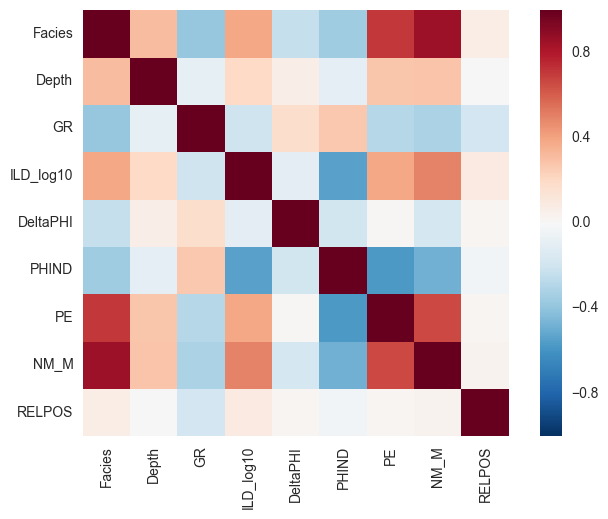

In [6]:
sns.heatmap(training_data.corr(), vmax=1.0, square=True)

In [7]:
training_data.describe()

/Users/littleni/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,NaN,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,NaN,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,NaN,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


# Data Preparation and Model Selection

Now we are ready to test the XGB approach, along the way confusion matrix and f1_score are imported as metric for classification, as well as GridSearchCV, which is an excellent tool for parameter optimization. 

In [17]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
from classification_utilities import display_cm, display_adj_cm
from sklearn.model_selection import GridSearchCV

In [12]:
X_train = training_data.drop(['Facies', 'Well Name','Formation','Depth'], axis = 1 ) 
Y_train = training_data['Facies' ] - 1
dtrain = xgb.DMatrix(X_train, Y_train)

The accuracy function and accuracy_adjacent function are defined in teh following to quatify the prediction correctness. 

In [13]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            total_correct += conf[i][j]
    return total_correct / sum(sum(conf))

Initial model


Model Report
-Accuracy: 0.970354
-Adjacent Accuracy: 0.993492

Confusion Matrix
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS   259     5     4                                       268
     CSiS     1   919    20                                       940
     FSiS     1    34   745                                       780
     SiSh                     268           2           1         271
       MS           1           1   285     5           4         296
       WS                 1     1     4   566          10         582
        D                                   1   137           3   141
       PS                 1     4     2    15         664         686
       BS                       1           1               183   185

Precision  0.99  0.96  0.97  0.97  0.98  0.96  1.00  0.98  0.98  0.97
   Recall  0.97  0.98  0.96  0.99  0.96  0.97  0.97  0.97  0.99  0.97
       F1  0.98  0.97  0.96  0.98  0.97  0.97  0.99  0.97  0.99  0.9

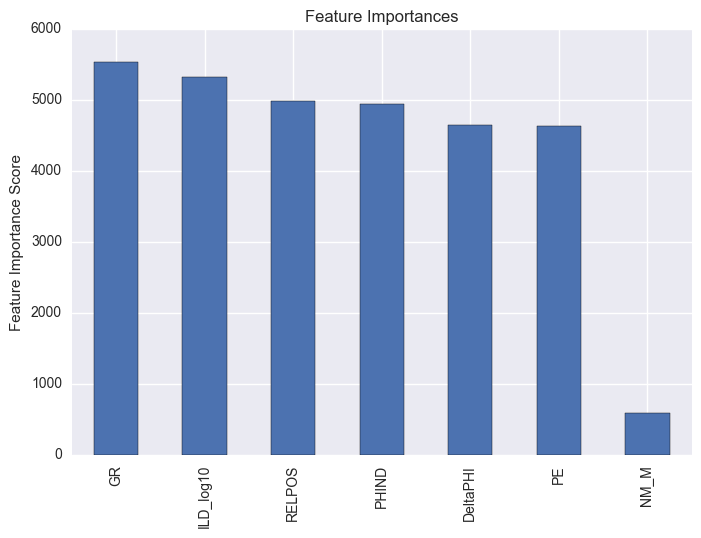

In [10]:
# Proposed Initial Model
xgb1 = xgb.XGBClassifier( learning_rate =0.1, n_estimators=200, max_depth=5,
                          min_child_weight=1, gamma=0, subsample=0.6,
                          colsample_bytree=0.6, reg_alpha=0, reg_lambda=1, objective='multi:softmax',
                          nthread=4, scale_pos_weight=1, seed=100)


#Fit the algorithm on the data
xgb1.fit(X_train, Y_train,eval_metric='merror')

#Predict training set:
predictions = xgb1.predict(X_train)
        
#Print model report

# Confusion Matrix
conf = confusion_matrix(Y_train, predictions)

# Print Results
print ("\nModel Report")
print ("-Accuracy: %.6f" % ( accuracy(conf) ))
print ("-Adjacent Accuracy: %.6f" % ( accuracy_adjacent(conf, adjacent_facies) ))

print ("\nConfusion Matrix")
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)

# Print Feature Importance
feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [11]:
# Cross Validation parameters
cv_folds = 10
rounds = 100

xgb_param_1 = xgb1.get_xgb_params()
xgb_param_1['num_class'] = 9

# Perform cross-validation
cvresult1 = xgb.cv(xgb_param_1, dtrain, num_boost_round=xgb_param_1['n_estimators'], 
                  stratified = True, nfold=cv_folds, metrics='merror', early_stopping_rounds=rounds)

print ("\nCross Validation Training Report Summary")
print (cvresult1.head())
print (cvresult1.tail())


Cross Validation Training Report Summary
   test-merror-mean  test-merror-std  train-merror-mean  train-merror-std
0          0.463624         0.034581           0.419595          0.019798
1          0.433773         0.028935           0.372004          0.014199
2          0.408699         0.026354           0.350609          0.007946
3          0.404589         0.026290           0.339788          0.007658
4          0.398107         0.024423           0.331486          0.007193
     test-merror-mean  test-merror-std  train-merror-mean  train-merror-std
195          0.292358         0.021023           0.023353          0.000796
196          0.290915         0.021367           0.022790          0.000619
197          0.291154         0.020785           0.022522          0.000776
198          0.291633         0.021096           0.022281          0.000906
199          0.290673         0.019750           0.021612          0.001124


The typical range for learning rate is around 0.01~0.2, so we vary ther learning rate a bit and at the same time, scan over the number of boosted trees to fit. This will take a little bit of time to finish. 

In [12]:
print("Parameter optimization")
grid_search1 = GridSearchCV(xgb1,{'learning_rate':[0.05,0.01,0.1,0.2] , 'n_estimators':[200,400,600,800]},
                                   scoring='accuracy' , n_jobs = 4)
grid_search1.fit(X_train,Y_train)
print("Best Set of Parameters")
grid_search1.grid_scores_, grid_search1.best_params_, grid_search1.best_score_

Parameter optimization
Best Set of Parameters


C:\Users\chenzhan\AppData\Local\Continuum\Anaconda64\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54616, std: 0.03023, params: {'n_estimators': 200, 'learning_rate': 0.05},
  mean: 0.53893, std: 0.02403, params: {'n_estimators': 400, 'learning_rate': 0.05},
  mean: 0.53651, std: 0.02372, params: {'n_estimators': 600, 'learning_rate': 0.05},
  mean: 0.53169, std: 0.02483, params: {'n_estimators': 800, 'learning_rate': 0.05},
  mean: 0.55363, std: 0.02880, params: {'n_estimators': 200, 'learning_rate': 0.01},
  mean: 0.55604, std: 0.02784, params: {'n_estimators': 400, 'learning_rate': 0.01},
  mean: 0.55411, std: 0.02605, params: {'n_estimators': 600, 'learning_rate': 0.01},
  mean: 0.54832, std: 0.02556, params: {'n_estimators': 800, 'learning_rate': 0.01},
  mean: 0.53989, std: 0.02591, params: {'n_estimators': 200, 'learning_rate': 0.1},
  mean: 0.53507, std: 0.02213, params: {'n_estimators': 400, 'learning_rate': 0.1},
  mean: 0.52711, std: 0.02248, params: {'n_estimators': 600, 'learning_rate': 0.1},
  mean: 0.52663, std: 0.02164, params: {'n_estimators': 800, 'learni

It seems that we need to adjust the learning rate and make it smaller, which could help to reduce overfitting in my opinion. The number of boosted trees to fit also requires to be updated. 


Model Report
-Accuracy: 0.779706
-Adjacent Accuracy: 0.952519

Confusion Matrix
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS   166    89    13                                       268
     CSiS    18   803   116                 2           1         940
     FSiS         139   635                 1           5         780
     SiSh                 6   224     1    27     2    11         271
       MS           6     5    17   151    75     2    40         296
       WS     1           2    30    14   432     7    93     3   582
        D                 1     3           5   106    25     1   141
       PS           1     6    16     4    82     9   566     2   686
       BS                                   8     2    23   152   185

Precision  0.90  0.77  0.81  0.77  0.89  0.68  0.83  0.74  0.96  0.79
   Recall  0.62  0.85  0.81  0.83  0.51  0.74  0.75  0.83  0.82  0.78
       F1  0.73  0.81  0.81  0.80  0.65  0.71  0.79  0.78  0.89  0.7

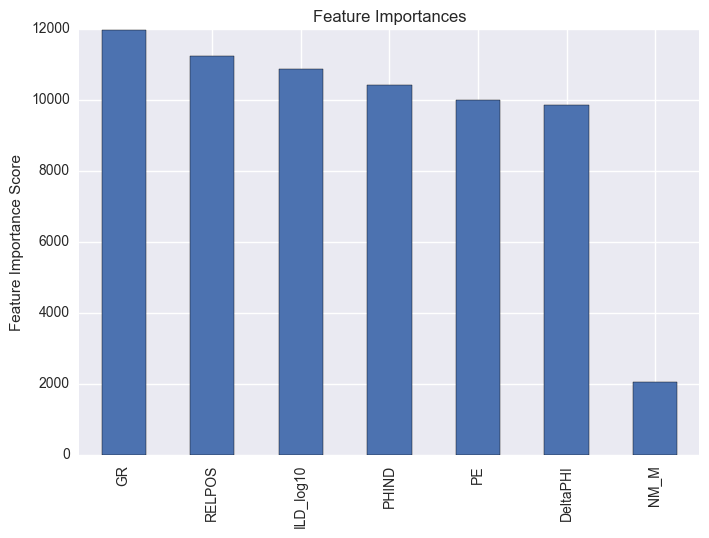

In [13]:
# Proposed Model with optimized learning rate and number of boosted trees to fit
xgb2 = xgb.XGBClassifier( learning_rate =0.01, n_estimators=400, max_depth=5,
                          min_child_weight=1, gamma=0, subsample=0.6,
                          colsample_bytree=0.6, reg_alpha=0, reg_lambda=1, objective='multi:softmax',
                          nthread=4, scale_pos_weight=1, seed=100)

#Fit the algorithm on the data
xgb2.fit(X_train, Y_train,eval_metric='merror')

#Predict training set:
predictions = xgb2.predict(X_train)
        
#Print model report

# Confusion Matrix
conf = confusion_matrix(Y_train, predictions )

# Print Results
print ("\nModel Report")
print ("-Accuracy: %.6f" % ( accuracy(conf) ))
print ("-Adjacent Accuracy: %.6f" % ( accuracy_adjacent(conf, adjacent_facies) ))

# Confusion Matrix
print ("\nConfusion Matrix")
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)

# Print Feature Importance
feat_imp = pd.Series(xgb2.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [14]:
# Cross Validation parameters
cv_folds = 10
rounds = 100

xgb_param_2 = xgb2.get_xgb_params()
xgb_param_2['num_class'] = 9

# Perform cross-validation
cvresult2 = xgb.cv(xgb_param_2, dtrain, num_boost_round=xgb_param_2['n_estimators'], 
                  stratified = True, nfold=cv_folds, metrics='merror', early_stopping_rounds=rounds)

print ("\nCross Validation Training Report Summary")
print (cvresult2.head())
print (cvresult2.tail())


Cross Validation Training Report Summary
   test-merror-mean  test-merror-std  train-merror-mean  train-merror-std
0          0.463624         0.034581           0.419595          0.019798
1          0.435210         0.031384           0.375298          0.014082
2          0.420986         0.024074           0.356848          0.010152
3          0.416908         0.024509           0.351465          0.008039
4          0.403438         0.015630           0.345599          0.005708
     test-merror-mean  test-merror-std  train-merror-mean  train-merror-std
395          0.336699         0.025564           0.214028          0.002945
396          0.337423         0.025555           0.213947          0.002970
397          0.336940         0.025623           0.213760          0.002869
398          0.336223         0.026504           0.213385          0.002796
399          0.335978         0.025790           0.213305          0.002611


In [15]:
print("Parameter optimization")
grid_search2 = GridSearchCV(xgb2,{'reg_alpha':[0, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10], 'reg_lambda':[0, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10] },
                                   scoring='accuracy' , n_jobs = 4)
grid_search2.fit(X_train,Y_train)
print("Best Set of Parameters")
grid_search2.grid_scores_, grid_search2.best_params_, grid_search2.best_score_

Parameter optimization
Best Set of Parameters


C:\Users\chenzhan\AppData\Local\Continuum\Anaconda64\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55363, std: 0.02560, params: {'reg_alpha': 0, 'reg_lambda': 0},
  mean: 0.55483, std: 0.02838, params: {'reg_alpha': 0, 'reg_lambda': 0.05},
  mean: 0.55483, std: 0.02776, params: {'reg_alpha': 0, 'reg_lambda': 0.1},
  mean: 0.55459, std: 0.02749, params: {'reg_alpha': 0, 'reg_lambda': 0.2},
  mean: 0.55483, std: 0.02620, params: {'reg_alpha': 0, 'reg_lambda': 0.5},
  mean: 0.55604, std: 0.02784, params: {'reg_alpha': 0, 'reg_lambda': 1},
  mean: 0.55459, std: 0.02897, params: {'reg_alpha': 0, 'reg_lambda': 2},
  mean: 0.55098, std: 0.02991, params: {'reg_alpha': 0, 'reg_lambda': 5},
  mean: 0.55242, std: 0.03191, params: {'reg_alpha': 0, 'reg_lambda': 10},
  mean: 0.55411, std: 0.02701, params: {'reg_alpha': 0.05, 'reg_lambda': 0},
  mean: 0.55459, std: 0.02749, params: {'reg_alpha': 0.05, 'reg_lambda': 0.05},
  mean: 0.55459, std: 0.02784, params: {'reg_alpha': 0.05, 'reg_lambda': 0.1},
  mean: 0.55580, std: 0.02595, params: {'reg_alpha': 0.05, 'reg_lambda': 0.2},
  mean: 0


Model Report
-Accuracy: 0.784285
-Adjacent Accuracy: 0.953242

Confusion Matrix
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS   167    89    12                                       268
     CSiS    17   808   112                 2           1         940
     FSiS         139   636                 2           3         780
     SiSh                 6   225     1    26     2    11         271
       MS           6     5    17   152    74     2    40         296
       WS     1           2    29    12   440     7    88     3   582
        D                 1     3           5   106    25     1   141
       PS           1     6    16     5    82     9   566     1   686
       BS                                   8     2    21   154   185

Precision  0.90  0.77  0.82  0.78  0.89  0.69  0.83  0.75  0.97  0.79
   Recall  0.62  0.86  0.82  0.83  0.51  0.76  0.75  0.83  0.83  0.78
       F1  0.74  0.81  0.82  0.80  0.65  0.72  0.79  0.79  0.90  0.7

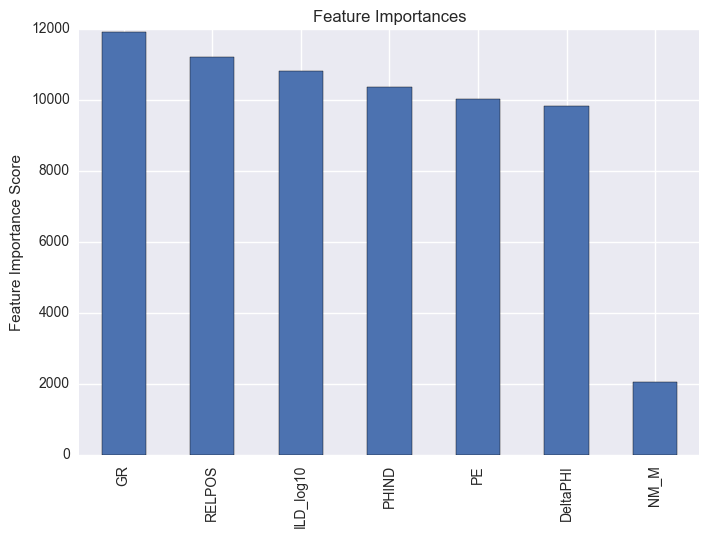

In [16]:
# Proposed Model with optimized regularization 
xgb3 = xgb.XGBClassifier( learning_rate =0.01, n_estimators=400, max_depth=5,
                          min_child_weight=1, gamma=0, subsample=0.6,
                          colsample_bytree=0.6, reg_alpha=0.1, reg_lambda=0.5, objective='multi:softmax',
                          nthread=4, scale_pos_weight=1, seed=100)

#Fit the algorithm on the data
xgb3.fit(X_train, Y_train,eval_metric='merror')

#Predict training set:
predictions = xgb3.predict(X_train)
        
#Print model report

# Confusion Matrix
conf = confusion_matrix(Y_train, predictions )

# Print Results
print ("\nModel Report")
print ("-Accuracy: %.6f" % ( accuracy(conf) ))
print ("-Adjacent Accuracy: %.6f" % ( accuracy_adjacent(conf, adjacent_facies) ))

# Confusion Matrix
print ("\nConfusion Matrix")
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)

# Print Feature Importance
feat_imp = pd.Series(xgb3.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [17]:
print("Parameter optimization")
grid_search3 = GridSearchCV(xgb3,{'max_depth':[2, 5, 8], 'gamma':[0, 1], 'subsample':[0.4, 0.6, 0.8],'colsample_bytree':[0.4, 0.6, 0.8] },
                                   scoring='accuracy' , n_jobs = 4)
grid_search3.fit(X_train,Y_train)
print("Best Set of Parameters")
grid_search3.grid_scores_, grid_search3.best_params_, grid_search3.best_score_

Parameter optimization
Best Set of Parameters


C:\Users\chenzhan\AppData\Local\Continuum\Anaconda64\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55146, std: 0.02078, params: {'max_depth': 2, 'subsample': 0.4, 'gamma': 0, 'colsample_bytree': 0.4},
  mean: 0.55170, std: 0.01781, params: {'colsample_bytree': 0.4, 'max_depth': 2, 'subsample': 0.6, 'gamma': 0},
  mean: 0.54977, std: 0.01751, params: {'colsample_bytree': 0.4, 'max_depth': 2, 'subsample': 0.8, 'gamma': 0},
  mean: 0.53531, std: 0.01736, params: {'max_depth': 5, 'subsample': 0.4, 'gamma': 0, 'colsample_bytree': 0.4},
  mean: 0.54182, std: 0.01044, params: {'subsample': 0.6, 'max_depth': 5, 'gamma': 0, 'colsample_bytree': 0.4},
  mean: 0.53917, std: 0.01401, params: {'colsample_bytree': 0.4, 'max_depth': 5, 'subsample': 0.8, 'gamma': 0},
  mean: 0.52953, std: 0.01619, params: {'max_depth': 8, 'subsample': 0.4, 'gamma': 0, 'colsample_bytree': 0.4},
  mean: 0.52832, std: 0.01334, params: {'max_depth': 8, 'subsample': 0.6, 'gamma': 0, 'colsample_bytree': 0.4},
  mean: 0.53025, std: 0.01603, params: {'colsample_bytree': 0.4, 'max_depth': 8, 'subsample': 0.8, 'gamm

In [18]:
# Load data 
filename = '../facies_vectors.csv'
data = pd.read_csv(filename)

# Change to category data type
data['Well Name'] = data['Well Name'].astype('category')
data['Formation'] = data['Formation'].astype('category')

# Leave one well out for cross validation 
well_names = data['Well Name'].unique()
f1=[]
for i in range(len(well_names)):
    
    # Split data for training and testing
    X_train = data.drop(['Facies', 'Formation','Depth'], axis = 1 ) 
    Y_train = data['Facies' ] - 1
    
    train_X = X_train[X_train['Well Name'] != well_names[i] ]
    train_Y = Y_train[X_train['Well Name'] != well_names[i] ]
    test_X  = X_train[X_train['Well Name'] == well_names[i] ]
    test_Y  = Y_train[X_train['Well Name'] == well_names[i] ]

    train_X = train_X.drop(['Well Name'], axis = 1 ) 
    test_X = test_X.drop(['Well Name'], axis = 1 )

    # Final recommended model based on the extensive parameters search
    model_final = xgb.XGBClassifier( learning_rate =0.01, n_estimators=400, max_depth=5,
                                   min_child_weight=1, gamma=0, subsample=0.6, reg_alpha=0.1, reg_lambda=0.5,
                                   colsample_bytree=0.6, objective='multi:softmax',
                                   nthread=4, scale_pos_weight=1, seed=100)

    # Train the model based on training data
    model_final.fit( train_X , train_Y , eval_metric = 'merror' )


    # Predict on the test set
    predictions = model_final.predict(test_X)

    # Print report
    print ("\n------------------------------------------------------")
    print ("Validation on the leaving out well " + well_names[i])
    conf = confusion_matrix( test_Y, predictions, labels = np.arange(9) )
    print ("\nModel Report")
    print ("-Accuracy: %.6f" % ( accuracy(conf) ))
    print ("-Adjacent Accuracy: %.6f" % ( accuracy_adjacent(conf, adjacent_facies) ))
    print ("-F1 Score: %.6f" % ( f1_score ( test_Y , predictions , labels = np.arange(9), average = 'weighted' ) ))
    f1.append(f1_score ( test_Y , predictions , labels = np.arange(9), average = 'weighted' ))
    facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                     'WS', 'D','PS', 'BS']
    print ("\nConfusion Matrix Results")
    from classification_utilities import display_cm, display_adj_cm
    display_cm(conf, facies_labels,display_metrics=True, hide_zeros=True)
    
print ("\n------------------------------------------------------")
print ("Final Results")
print ("-Average F1 Score: %6f" % (sum(f1)/(1.0*len(f1))))


------------------------------------------------------
Validation on the leaving out well SHRIMPLIN

Model Report
-Accuracy: 0.607219
-Adjacent Accuracy: 0.959660
-F1 Score: 0.587285

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS                                                           0
     CSiS     7    94    17                                       118
     FSiS          52    71                                       123
     SiSh                      13           2           3          18
       MS                       6     6    43           8          63
       WS                       2     2    38     1    18     2    63
        D                                   1     1     3           5
       PS                             2    10     1    52     4    69
       BS                                               1    11    12

Precision  0.00  0.64  0.81  0.62  0.60  0.40  0.33  0.61  0.65  0.64
   Recall

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well ALEXANDER D

Model Report
-Accuracy: 0.626609
-Adjacent Accuracy: 0.916309
-F1 Score: 0.589447

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS                                                           0
     CSiS          85    32                                       117
     FSiS          17    74                                        91
     SiSh                      39                 3     2          44
       MS                       3    11     2          10          26
       WS                      12    19     1     4    33          69
        D                             1           8     7          16
       PS                       7     3     5     8    73     2    98
       BS                                   1     3           1     5

Precision  0.00  0.83  0.70  0.64  0.32  0.11  0.31  0.58  0.33  0.58
   Reca

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well SHANKLE

Model Report
-Accuracy: 0.487751
-Adjacent Accuracy: 0.966592
-F1 Score: 0.467278

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS     7    81     1                                        89
     CSiS     8    69    12                                        89
     FSiS          55    61                             1         117
     SiSh                       4           1           2           7
       MS                      14           3     1     1          19
       WS                       7     5    46          13          71
        D                             1     2     9     5          17
       PS                                  16     1    23          40
       BS                                                           0

Precision  0.47  0.34  0.82  0.16  0.00  0.68  0.82  0.51  0.00  0.56
   Recall  

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well LUKE G U

Model Report
-Accuracy: 0.637744
-Adjacent Accuracy: 0.928416
-F1 Score: 0.659138

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS                                                           0
     CSiS    11    88    18                                       117
     FSiS     7    43    75                             4         129
     SiSh                      31     1     3                      35
       MS                             1                 1           2
       WS                       8    17    42          16     1    84
        D                                   1     7    11     1    20
       PS                 2     3     3    15     1    50          74
       BS                                                           0

Precision  0.00  0.67  0.79  0.74  0.05  0.69  0.88  0.61  0.00  0.71
   Recall 

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well KIMZEY A

Model Report
-Accuracy: 0.530752
-Adjacent Accuracy: 0.895216
-F1 Score: 0.495145

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS           5     4                                         9
     CSiS          75    10                                        85
     FSiS          40    34                                        74
     SiSh                      27          16                      43
       MS                       7     2    29          15          53
       WS                 1     3          28     1    18          51
        D                       3           5     5    14          27
       PS                       1     1    24     4    60          90
       BS                                   2           3     2     7

Precision  0.00  0.62  0.69  0.66  0.67  0.27  0.50  0.55  1.00  0.57
   Recall 

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



------------------------------------------------------
Validation on the leaving out well CROSS H CATTLE

Model Report
-Accuracy: 0.361277
-Adjacent Accuracy: 0.878244
-F1 Score: 0.339461

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    31   112    15                                       158
     CSiS     2    58    81                             1         142
     FSiS           5    39                 1           2          47
     SiSh                 4     1     2    17           1          25
       MS           4     3                17     1     3          28
       WS                                  24     1     6          31
        D                                         1     1           2
       PS                 4     4     1    27     5    27          68
       BS                                                           0

Precision  0.94  0.32  0.27  0.20  0.00  0.28  0.12  0.66  0.00  0.53
   R

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well NOLAN

Model Report
-Accuracy: 0.520482
-Adjacent Accuracy: 0.872289
-F1 Score: 0.541316

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS           4                                               4
     CSiS    15    85    17                 1                     118
     FSiS     3    23    39                 1           2          68
     SiSh           1           7     3    11     1     5          28
       MS           1     2           1    32     1     6     4    47
       WS     1                 1          11          12     5    30
        D                       1                 2     1           4
       PS                 5     1          14     2    71    23   116
       BS                                                           0

Precision  0.00  0.75  0.62  0.70  0.25  0.16  0.33  0.73  0.00  0.61
   Recall  0.

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well Recruit F9

Model Report
-Accuracy: 0.637500
-Adjacent Accuracy: 0.925000
-F1 Score: 0.778626

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS                                                           0
     CSiS                                                           0
     FSiS                                                           0
     SiSh                                                           0
       MS                                                           0
       WS                                                           0
        D                                                           0
       PS                                                           0
       BS                       1           5     4    19    51    80

Precision  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  1.00
   Recal

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well NEWBY

Model Report
-Accuracy: 0.494600
-Adjacent Accuracy: 0.892009
-F1 Score: 0.486147

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS                                                           0
     CSiS    12    62    23                             1          98
     FSiS     1    36    43                                        80
     SiSh           1          34     4    14     2     3          58
       MS                 3     2           8     4    11          28
       WS                       4    12    40     1    39          96
        D                                   3     4     9          16
       PS                             1    10          45          56
       BS                                   5          25     1    31

Precision  0.00  0.63  0.62  0.85  0.00  0.50  0.36  0.34  1.00  0.57
   Recall  0.

/Users/littleni/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



------------------------------------------------------
Validation on the leaving out well CHURCHMAN BIBLE

Model Report
-Accuracy: 0.574257
-Adjacent Accuracy: 0.878713
-F1 Score: 0.548002

Confusion Matrix Results
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS           7     1                                         8
     CSiS     3    31    21                 1                      56
     FSiS           8    39     2           1           1          51
     SiSh                 1     7           5                      13
       MS                 1     4     3    18           4          30
       WS                      13          65           9          87
        D                 2     7           7     2    16          34
       PS                 3     1     3    24          43     1    75
       BS                       2           1           5    42    50

Precision  0.00  0.67  0.57  0.19  0.50  0.53  1.00  0.55  0.98  0.63
   

In [19]:
# Load test data
test_data = pd.read_csv('../validation_data_nofacies.csv')
test_data['Well Name'] = test_data['Well Name'].astype('category')
X_test = test_data.drop(['Formation', 'Well Name', 'Depth'], axis=1)
# Predict facies of unclassified data
Y_predicted = model_final.predict(X_test)
test_data['Facies'] = Y_predicted + 1
# Store the prediction
test_data.to_csv('Prediction1.csv')

In [20]:
test_data

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,2
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,2
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,2
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,2
5,A1 SH,STUART,2810.5,73.955,0.667,6.900,12.250,3.086,1,0.889,2
6,A1 SH,STUART,2811.0,77.962,0.674,6.500,12.450,3.092,1,0.867,2
7,A1 SH,STUART,2811.5,83.894,0.667,6.300,12.650,3.123,1,0.844,2
8,A1 SH,STUART,2812.0,84.424,0.653,6.700,13.050,3.121,1,0.822,2
9,A1 SH,STUART,2812.5,83.160,0.642,7.300,12.950,3.127,1,0.800,2


Future work, make more customerized objective function. Also, we could use RandomizedSearchCV instead of GridSearchCV to avoild potential local minimal trap and further improve the test results. 